Python illustration of 1-D arrays (vectors)

In [ ]:
import numpy as np

# Create a 1-D array of daily returns for an asset
returns = np.array([0.01, -0.005, 0.002, 0.007, -0.003])
print("Array shape:", returns.shape)
print("Returns vector:", returns)

Array shape: (5,)
Returns vector: [ 0.01  -0.005  0.002  0.007 -0.003]


Python illustration of 2-D arrays (matrices)

In [ ]:
import numpy as np

# Create a 2-D array (matrix): rows = dates, columns = assets
returns_matrix = np.array([
        [0.01,  -0.002,  0.005],
        [0.02,   0.015, -0.010],
        [0.005,  0.003,  0.007],
        [-0.003, 0.004,  0.009]])
print("Matrix shape:", returns_matrix.shape)
print("Returns matrix:\n", returns_matrix)

Matrix shape: (4, 3)
Returns matrix:
 [[ 0.01  -0.002  0.005]
 [ 0.02   0.015 -0.01 ]
 [ 0.005  0.003  0.007]
 [-0.003  0.004  0.009]]


Python illustration of dataFrames and tables

In [ ]:
import pandas as pd

# 1) Create OHLCV DataFrame for AAPL
dates = pd.date_range("2025-07-01", periods=5, freq="D")
df_prices = pd.DataFrame({
        "Open":  [100.25, 100.28, 100.32, 100.38, 100.40],
        "High":  [100.30, 100.35, 100.40, 100.42, 100.45],
        "Low":   [100.20, 100.25, 100.30, 100.35, 100.38],
        "Close": [100.28, 100.32, 100.38, 100.40, 100.42],
        "Volume":[12345, 18210, 22105, 14870, 16500]}, index=dates)

# 2) Compute daily return
df_prices["Return"] = df_prices["Close"].pct_change() * 100

# 3) Create fundamentals DataFrame and join
df_fund = pd.DataFrame({
        "P/E": [28.5, 28.5, 28.5, 28.5, 28.5],
        "ROE": [35.2, 35.2, 35.2, 35.2, 35.2]}, index=dates)

df_merged = df_prices.join(df_fund)
print(df_merged)

              Open    High     Low   Close  Volume    Return   P/E   ROE
2025-07-01  100.25  100.30  100.20  100.28   12345       NaN  28.5  35.2
2025-07-02  100.28  100.35  100.25  100.32   18210  0.039888  28.5  35.2
2025-07-03  100.32  100.40  100.30  100.38   22105  0.059809  28.5  35.2
2025-07-04  100.38  100.42  100.35  100.40   14870  0.019924  28.5  35.2
2025-07-05  100.40  100.45  100.38  100.42   16500  0.019920  28.5  35.2


Python illustration of time-series objects

In [ ]:
import pandas as pd

# 1) Create a daily time-series of closing prices
dates = pd.date_range("2025-07-01", periods=6, freq="D")
ts = pd.Series([100, 102, 101, 105, 107, 110], index=dates)

# 2) Lag operation: yesterday's price (no lookahead)
ts_lag1 = ts.shift(1)

# 3) Resample to 2-day frequency, taking the last available price
ts_2D = ts.resample("2D").last()

# 4) Rolling window: 3-day moving average
ts_ma3 = ts.rolling(window=3).mean()

print("Original series:\n", ts)
print("\nLagged (1 day):\n", ts_lag1)
print("\nResampled (2-day):\n", ts_2D)
print("\n3-day MA:\n", ts_ma3)

Original series:
 2025-07-01    100
2025-07-02    102
2025-07-03    101
2025-07-04    105
2025-07-05    107
2025-07-06    110
Freq: D, dtype: int64

Lagged (1 day):
 2025-07-01      NaN
2025-07-02    100.0
2025-07-03    102.0
2025-07-04    101.0
2025-07-05    105.0
2025-07-06    107.0
Freq: D, dtype: float64

Resampled (2-day):
 2025-07-01    102
2025-07-03    105
2025-07-05    110
Freq: 2D, dtype: int64

3-day MA:
 2025-07-01           NaN
2025-07-02           NaN
2025-07-03    101.000000
2025-07-04    102.666667
2025-07-05    104.333333
2025-07-06    107.333333
Freq: D, dtype: float64


Python illustration of tensors and higher-dimensional arrays

In [ ]:
import numpy as np
import torch

# 1) Create a 3-D NumPy array: (entity, time, feature)
#    500 stocks, 252 days, 4 features (Open, High, Low, Close)
ohcl_tensor = np.random.rand(500, 252, 4)

print("NumPy tensor shape:", ohcl_tensor.shape)
# NumPy tensor shape: (500, 252, 4)

# 2) Convert to a PyTorch tensor for model input
ohcl_torch = torch.from_numpy(ohcl_tensor).float()
print("PyTorch tensor shape:", ohcl_torch.size())

NumPy tensor shape: (500, 252, 4)
PyTorch tensor shape: torch.Size([500, 252, 4])


Python illustration of hierarchical / panel data structures

In [ ]:
import pandas as pd
import numpy as np

# 1) Construct a MultiIndex of dates × tickers
dates   = pd.date_range("2025-07-01", periods=3, freq="D")
tickers = ["AAPL", "GOOG", "MSFT"]
index   = pd.MultiIndex.from_product([dates, tickers], names=["Date", "Ticker"])

# 2) Create panel DataFrame of random returns
np.random.seed(0)
df_panel = pd.DataFrame({
    "Return": np.random.uniform(-0.01, 0.01, size=len(index))
}, index=index)

# 3) Cross-sectional ranking on each date
df_panel["Rank"] = (
    df_panel
      .groupby(level="Date")["Return"]
      .rank(ascending=False)
)

# 4) 2-day moving average per ticker
df_panel["MA2"] = (
    df_panel["Return"]
    .unstack(level="Ticker")
    .rolling(window=2)
    .mean()
    .stack(level="Ticker"))

print(df_panel)

                     Return  Rank       MA2
Date       Ticker                          
2025-07-01 AAPL    0.000976   3.0       NaN
           GOOG    0.004304   1.0       NaN
           MSFT    0.002055   2.0       NaN
2025-07-02 AAPL    0.000898   2.0  0.000937
           GOOG   -0.001527   3.0  0.001388
           MSFT    0.002918   1.0  0.002487
2025-07-03 AAPL   -0.001248   3.0 -0.000175
           GOOG    0.007835   2.0  0.003154
           MSFT    0.009273   1.0  0.006096


Bar chart

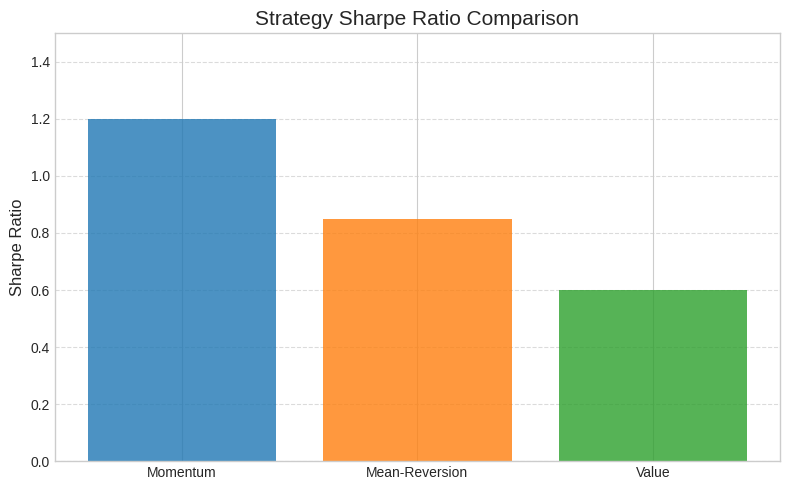

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
strategies = ['Momentum', 'Mean-Reversion', 'Value']
sharpe_ratios = [1.2, 0.85, 0.6]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue, Orange, Green

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(strategies, sharpe_ratios, color=colors, alpha=0.8)

# --- Formatting ---
ax.set_title('Strategy Sharpe Ratio Comparison', fontsize=15)
ax.set_ylabel('Sharpe Ratio', fontsize=12)
ax.set_ylim(0, 1.5)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Line chart

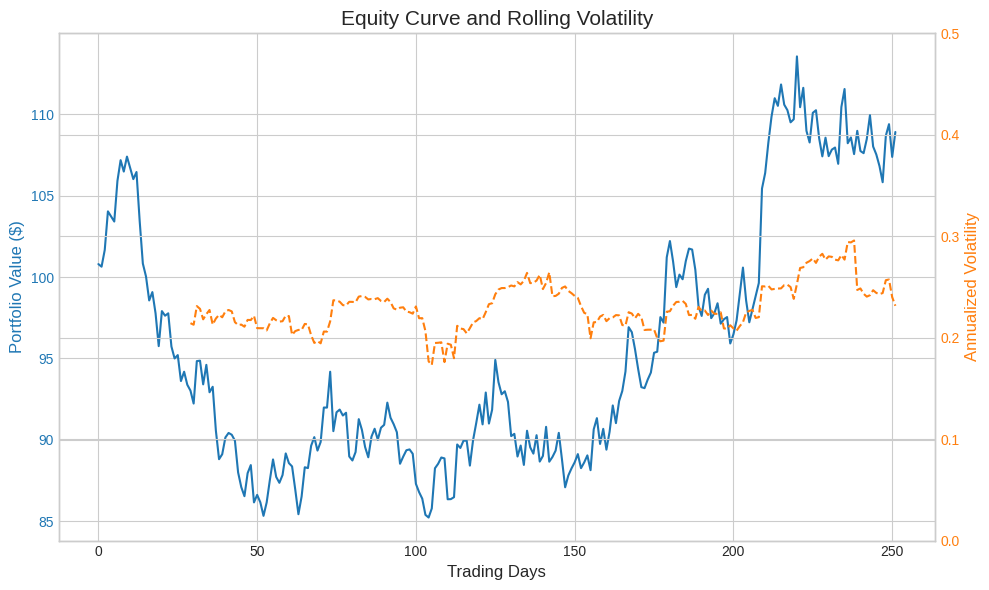

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Data ---
np.random.seed(42)
days = 252
returns = pd.Series(np.random.normal(0.0005, 0.015, days))
equity_curve = (1 + returns).cumprod() * 100
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)
colors = ['#1f77b4', '#ff7f0e']

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Equity Curve
ax1.plot(equity_curve, color=colors[0], label='Equity Curve')
ax1.set_xlabel('Trading Days', fontsize=12)
ax1.set_ylabel('Portfolio Value ($)', fontsize=12, color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])

# Plot Rolling Volatility on second y-axis
ax2 = ax1.twinx()
ax2.plot(rolling_vol, color=colors[1], linestyle='--',
label='30D Rolling Volatility')
ax2.set_ylabel('Annualized Volatility', fontsize=12, color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])
ax2.set_ylim(0, 0.5)

# --- Formatting ---
ax1.set_title('Equity Curve and Rolling Volatility', fontsize=15)
fig.tight_layout()
plt.show()

Radar chart (Spider chart)

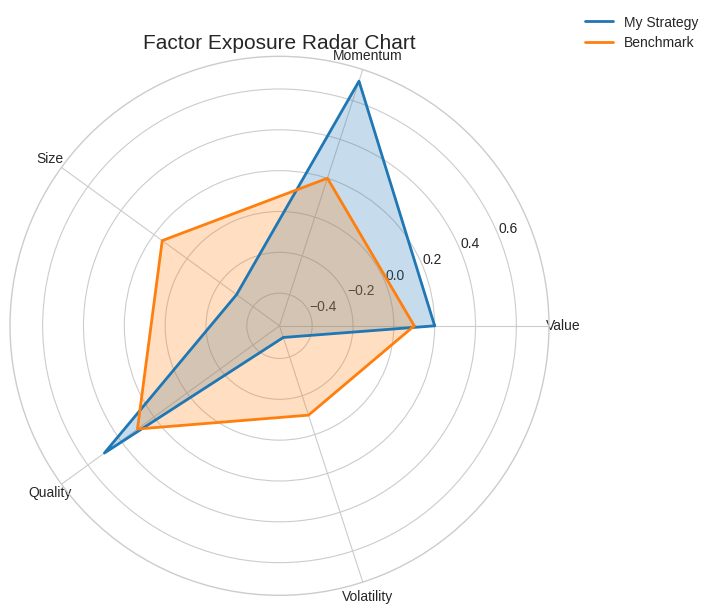

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
factors = ['Value', 'Momentum', 'Size', 'Quality', 'Volatility']
num_factors = len(factors)
strategy_loadings = [0.2, 0.7, -0.3, 0.5, -0.5]
benchmark_loadings = [0.1, 0.2, 0.15, 0.3, -0.1]
colors = ['#1f77b4', '#ff7f0e']

# --- Plot ---
angles = np.linspace(0, 2 * np.pi, num_factors,
                             endpoint=False).tolist()
angles += angles[:1] # Close the plot

strategy_loadings += strategy_loadings[:1]
benchmark_loadings += benchmark_loadings[:1]

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Plot Strategy
ax.plot(angles, strategy_loadings, color=colors[0], linewidth=2,
                label='My Strategy')
ax.fill(angles, strategy_loadings, color=colors[0], alpha=0.25)

# Plot Benchmark
ax.plot(angles, benchmark_loadings, color=colors[1], linewidth=2,
                label='Benchmark')
ax.fill(angles, benchmark_loadings, color=colors[1], alpha=0.25)

# --- Formatting ---
ax.set_thetagrids(np.degrees(angles[:-1]), factors)
ax.set_title('Factor Exposure Radar Chart', fontsize=15,
                     position=(0.5, 1.1))
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

Box plot (box-and-whisker plot)

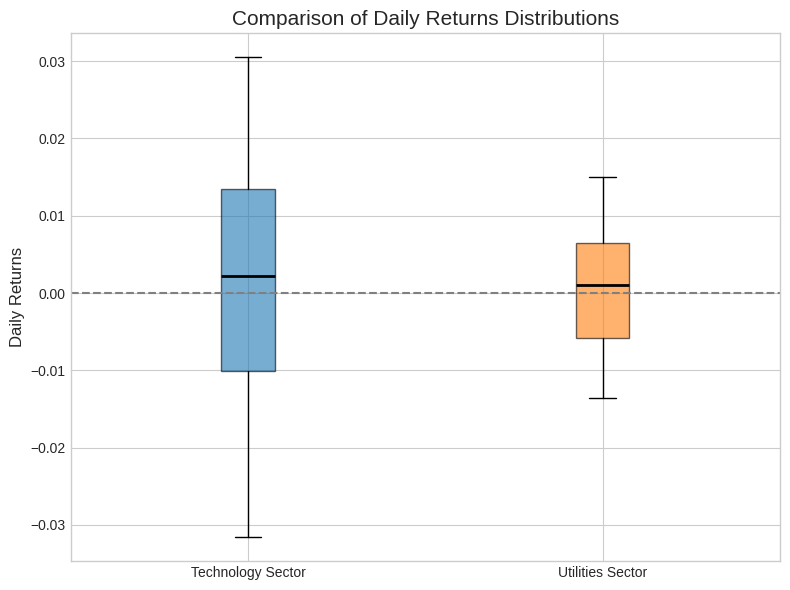

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
np.random.seed(10)
tech_returns = np.random.normal(0.0008, 0.02, 252)
utility_returns = np.random.normal(0.0003, 0.01, 252)
data_to_plot = [tech_returns, utility_returns]
colors = ['#1f77b4', '#ff7f0e']

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(data_to_plot, patch_artist=True, whis=[5, 95],
                        showfliers=False)

for patch, color in zip(bp['boxes'], colors):
  patch.set_facecolor(color)
  patch.set_alpha(0.6)

for median in bp['medians']:
  median.set_color('black')
  median.set_linewidth(2)

# --- Formatting ---
ax.set_xticklabels(['Technology Sector', 'Utilities Sector'])
ax.set_ylabel('Daily Returns', fontsize=12)
ax.set_title('Comparison of Daily Returns Distributions',
                        fontsize=15)
ax.axhline(0, color='grey', linestyle='--')

plt.tight_layout()
plt.show()

Bubble chart

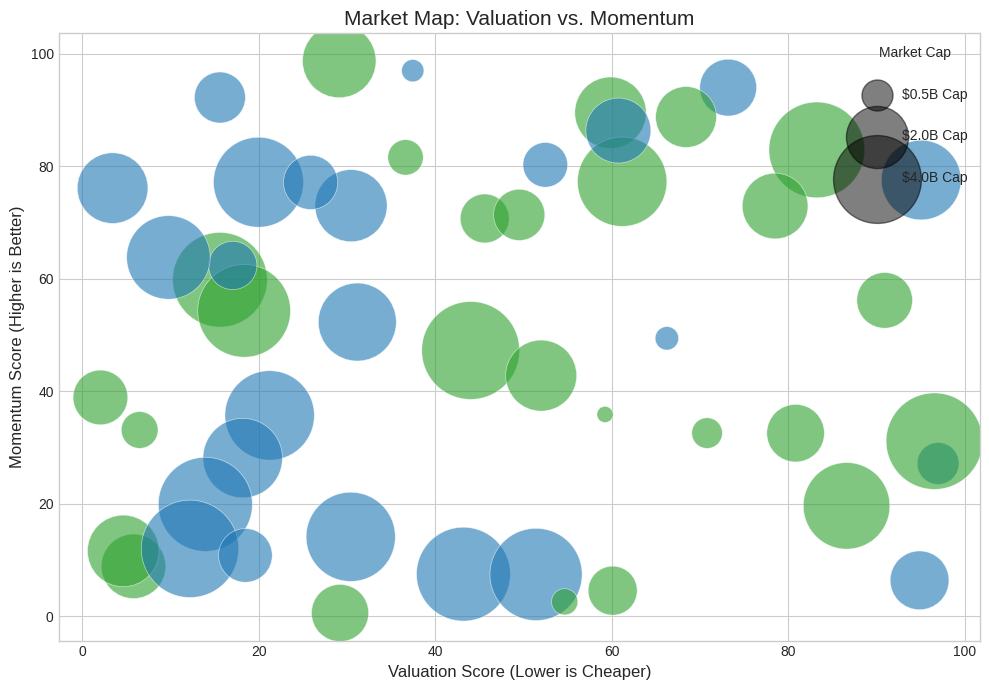

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
np.random.seed(42)
num_stocks = 50
valuation_score = np.random.rand(num_stocks) * 100
momentum_score = np.random.rand(num_stocks) * 100
market_cap = np.random.rand(num_stocks) * 5000 + 100
color_category = np.random.choice([0, 1], num_stocks)
colors = ['#1f77b4', '#2ca02c']

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

scatter = ax.scatter(valuation_score, momentum_score, s=market_cap,
                             c=[colors[i] for i in color_category], alpha=0.6,
                             edgecolors="w", linewidth=0.5)

# --- Formatting ---
ax.set_title('Market Map: Valuation vs. Momentum', fontsize=15)
ax.set_xlabel('Valuation Score (Lower is Cheaper)', fontsize=12)
ax.set_ylabel('Momentum Score (Higher is Better)', fontsize=12)

# Create a legend for the bubble size
for size in [500, 2000, 4000]:
  ax.scatter([], [], s=size, c='k', alpha=0.5,
  label=f'${size/1000:.1f}B Cap')
ax.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Market Cap')

plt.tight_layout()
plt.show()

Distribution plots

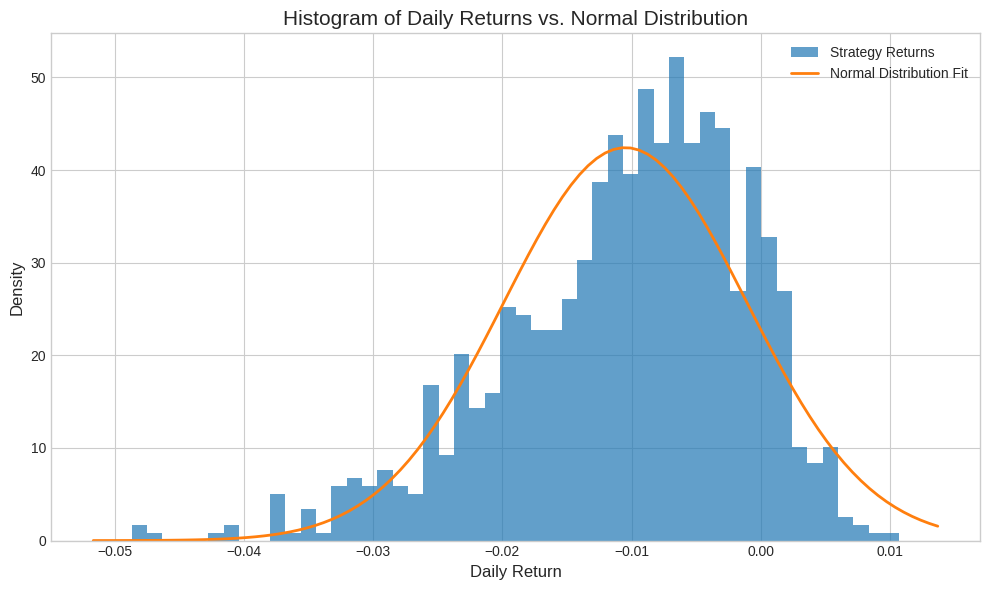

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, skewnorm

# --- Data ---
np.random.seed(42)
# Generate slightly negatively skewed returns (common in markets)
a = -4  # Skewness parameter
returns = skewnorm.rvs(a, loc=0.001, scale=0.015, size=1000)
colors = ['#1f77b4', '#ff7f0e']

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(returns, bins=50, density=True, color=colors[0], alpha=0.7,
                label='Strategy Returns')

# Overlay normal distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(returns)
p = norm.pdf(x, mu, std)
ax.plot(x, p, color=colors[1], linewidth=2,
                label='Normal Distribution Fit')

# --- Formatting ---
ax.set_title('Histogram of Daily Returns vs. Normal Distribution',
                     fontsize=15)
ax.set_xlabel('Daily Return', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

Violin plot

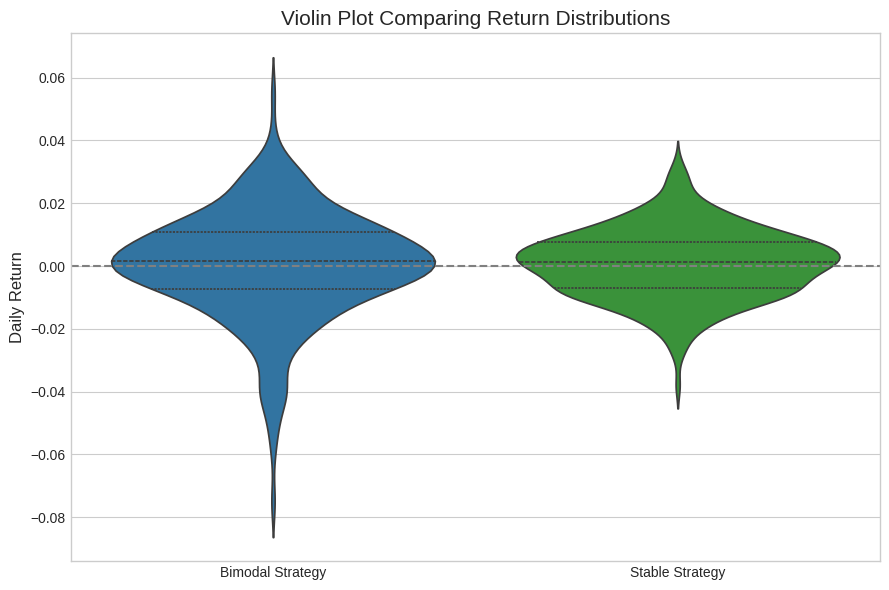

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# --- Data ---
np.random.seed(10)
# Regime 1: Low vol, positive returns
regime1_returns = np.random.normal(0.0008, 0.01, 150)
# Regime 2: High vol, slightly negative returns
regime2_returns = np.random.normal(-0.0005, 0.025, 100)
# A bimodal distribution from mixing two regimes
bimodal_returns = np.concatenate([regime1_returns, regime2_returns])
stable_returns = np.random.normal(0.0004, 0.012, 250)

df = pd.DataFrame({
            'Bimodal Strategy': bimodal_returns,
            'Stable Strategy': stable_returns})
colors = ['#1f77b4', '#2ca02c']

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(9, 6))

sns.violinplot(data=df, ax=ax, palette=colors, inner='quartile',
                       density_norm='width')

# --- Formatting ---
ax.set_title('Violin Plot Comparing Return Distributions',
                     fontsize=15)
ax.set_ylabel('Daily Return', fontsize=12)
ax.axhline(0, color='grey', linestyle='--')

plt.tight_layout()
plt.show()

Composition plots

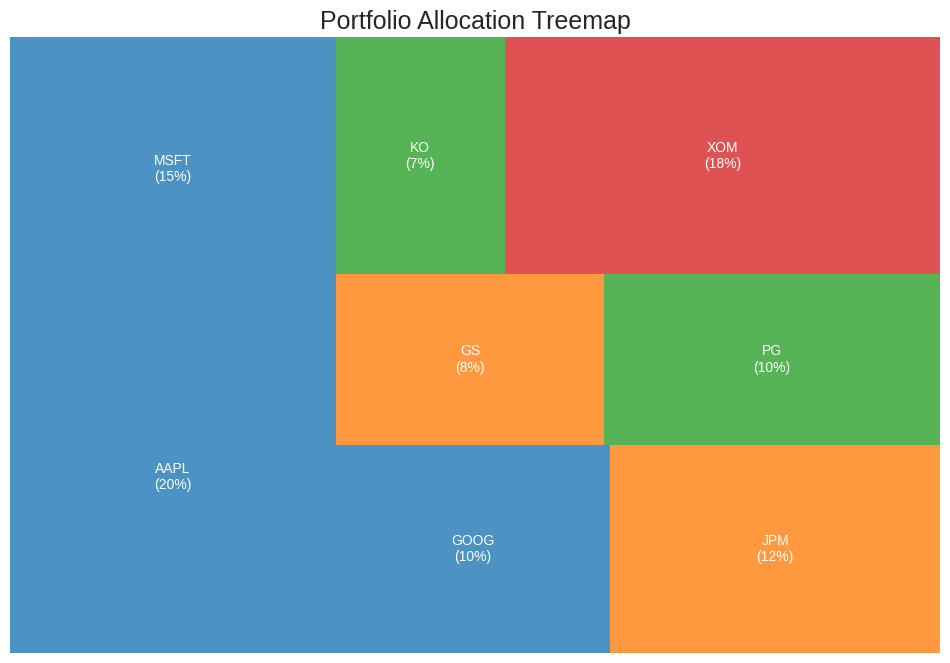

In [ ]:
!pip install squarify
import matplotlib.pyplot as plt
import squarify

# --- Data ---
portfolio_weights = {
            'Tech': {'AAPL': 20, 'MSFT': 15, 'GOOG': 10},
            'Finance': {'JPM': 12, 'GS': 8},
            'Consumer': {'PG': 10, 'KO': 7},
            'Energy': {'XOM': 18}}

# Flatten for squarify
sizes = []
labels = []
for sector, stocks in portfolio_weights.items():
  for stock, weight in stocks.items():
    sizes.append(weight)
    labels.append(f'{stock}\n({weight}%)')

# Assign colors by sector
sector_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
color_list = []
for i, (sector, stocks) in enumerate(portfolio_weights.items()):
  color_list.extend([sector_colors[i]] * len(stocks))

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

squarify.plot(sizes=sizes, label=labels, color=color_list, alpha=0.8,
                      text_kwargs={'color':'white', 'fontsize':10})

# --- Formatting ---
plt.title('Portfolio Allocation Treemap', fontsize=18)
plt.axis('off')
plt.show()

Stacked area chart

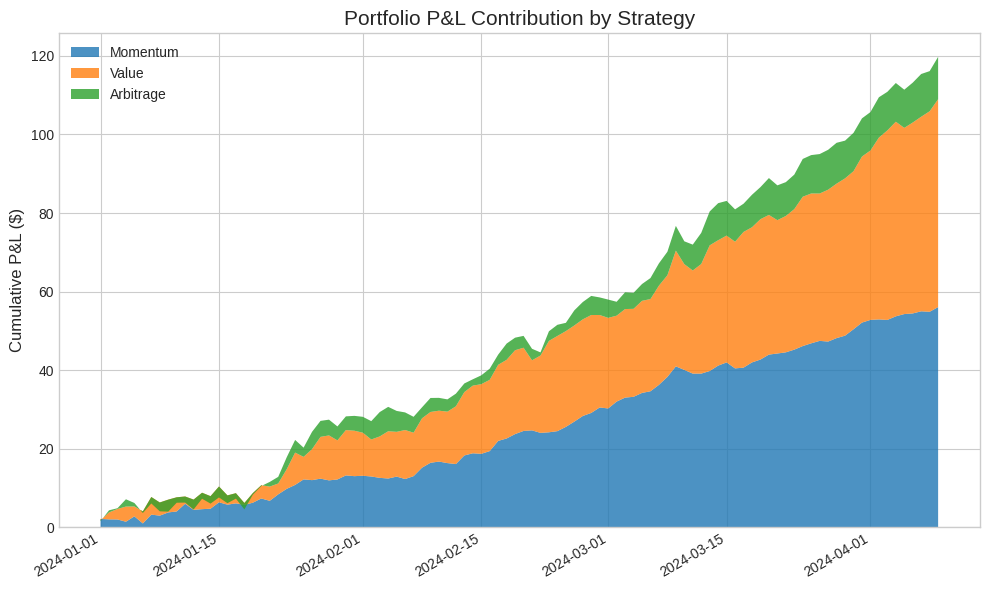

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Data ---
np.random.seed(1)
days = 100
dates = pd.to_datetime(pd.date_range(start='2024-01-01',
                            periods=days))

# PnL from three sub-strategies
strategy1_pnl = np.random.normal(0.5, 1, days).cumsum()
strategy2_pnl = np.random.normal(0.3, 1.5, days).cumsum()
strategy3_pnl = np.random.normal(0.1, 0.8, days).cumsum()

pnl_data = {
            'Momentum': strategy1_pnl,
            'Value': strategy2_pnl,
            'Arbitrage': strategy3_pnl}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(dates, pnl_data.values(), labels=pnl_data.keys(),
                     colors=colors, alpha=0.8)

# --- Formatting ---
ax.set_title('Portfolio P&L Contribution by Strategy', fontsize=15)
ax.set_ylabel('Cumulative P&L ($)', fontsize=12)
ax.legend(loc='upper left')
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

Flow plots

In [ ]:
import plotly.graph_objects as go

# Define consistent colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b']

# --- Data & Structure ---
labels = [
            "Universe (5000 stocks)", "Liquidity Filter", "Factor Screen",
            "Risk Model", "Final Portfolio (50)",
            "Not Liquid", "Low Factor Score", "High Risk"]

source = [0, 1, 2, 3, 0, 1, 2]
target = [1, 2, 3, 4, 5, 6, 7]
value  = [3000, 500, 100, 50, 2000, 2500, 400]

# Map nodes to colors
color_map = [colors[0], colors[1], colors[2], colors[3], colors[4],
                     '#aec7e8', '#ffbb78', '#98df8a'] # Lighter shades

# --- Plot ---
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15,
              thickness=20,
              line=dict(color="black", width=0.5),
              label=labels,
              color=color_map
            ),
            link=dict(
              source=source,
              target=target,
              value=value))])

# --- Formatting ---
fig.update_layout(title_text="Algorithmic Trading Strategy Funnel",
                          font_size=12)
fig.show()

Network graph

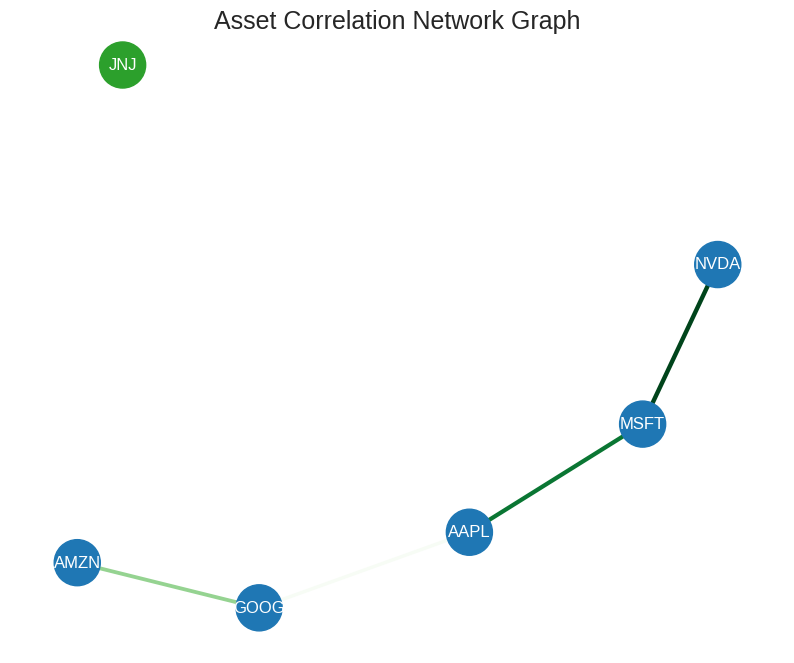

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

# --- Data ---
np.random.seed(42)
assets = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'JNJ']
returns_data = np.random.rand(100, 6)
# Create a correlation structure
returns_data[:, 1] += returns_data[:, 0] * 0.7
returns_data[:, 2] += returns_data[:, 0] * 0.6
returns_data[:, 3] += returns_data[:, 2] * 0.5
returns_data[:, 4] += returns_data[:, 1] * 0.8

df_returns = pd.DataFrame(returns_data, columns=assets)
correlation_matrix = df_returns.corr()

# --- Graph Creation ---
G = nx.Graph()
for asset in assets:
  G.add_node(asset)

# Add edges based on correlation threshold
threshold = 0.4
for i in range(len(assets)):
  for j in range(i + 1, len(assets)):
    corr = correlation_matrix.iloc[i, j]
    if abs(corr) > threshold:
      G.add_edge(assets[i], assets[j], weight=abs(corr))

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)

# Get edge widths and colors
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]
edge_colors = [G[u][v]['weight'] for u,v in edges]

# Define node colors
node_colors = ['#1f77b4'] * 5 + ['#2ca02c']

nx.draw(G, pos, with_labels=True, node_color=node_colors,
                node_size=1100, font_size=12,
                font_color='white', width=weights, edge_cmap=plt.cm.Greens,
                edge_color=edge_colors, ax=ax)

# --- Formatting ---
ax.set_title('Asset Correlation Network Graph', fontsize=18)
plt.show()